Project: Conditional Probability Analysis
Course: Mathematics for Data Science
Author: Omer Zaman
Date: 12 April 2025

Goal:
- Generate Data (40,000 for age values)
- Purchasing Decision (Randomised)
- Check weighted purhcases by assigning a probability based on age and calculate it's Conditional Probability (learn this)
- Check weightless pruchases 
- Visualize the two via graph
- Analyze

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# For reproducibility when the professor or I are testing the code
np.random.seed(50)
ages = np.random.choice([20, 30, 40, 50, 60, 70], size=40000)
df = pd.DataFrame({'Age': ages})
df.head()

,Age
0,20
1,20
2,50
3,70
4,30


In [ ]:
# Assign Probability Weight for Bias (Might change)
age_weights = {20: 0.1, 30: 0.2, 40: 0.3, 50: 0.5, 60: 0.7, 70: 0.9}

# Assigning random Purchase where 1 = Purchase, 0 = No Purchase
df['Weighted_Purchase'] = df['Age'].map(age_weights).apply(lambda p: np.random.binomial(1, p))
df.head()


,Age,Weighted_Purchase
0,20,0
1,20,0
2,50,0
3,70,1
4,30,0


In [18]:
# Assigning same probability due to Unbiased (May Change so it looks better on the graph og=0.2)
uniform_weights = {20: 0.3, 30: 0.3, 40: 0.3, 50: 0.3, 60: 0.3, 70: 0.3}

# Assigning random Purchase where 1 = Purchase, 0 = No Purchase
df['Uniform_Purchase'] = df['Age'].map(uniform_weights).apply(lambda p: np.random.binomial(1, p))

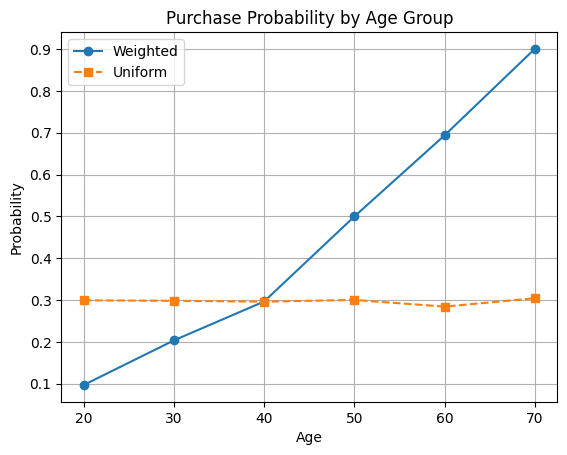

In [25]:
#Plotting the two on a graph as per requirement
weighted_curve = df.groupby('Age')['Weighted_Purchase'].mean().reset_index(name='Probability')
uniform_curve = df.groupby('Age')['Uniform_Purchase'].mean().reset_index(name='Probability')

plt.plot(weighted_curve['Age'], weighted_curve['Probability'], label='Weighted', marker='o')
plt.plot(uniform_curve['Age'], uniform_curve['Probability'], label='Uniform', marker='s', linestyle='--')
plt.title('Purchase Probability by Age Group')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

water


In [24]:
#Probability Calculation Final Result
print("Key Results:")
print(f"Weighted P(Purchase | Age=70): {weighted_curve.query('Age == 70').Probability.iloc[0]:.2%}")
print(f"Uniform P(Purchase | Age=70): {uniform_curve.query('Age == 70').Probability.iloc[0]:.2%}")

Key Results:
Weighted P(Purchase | Age=70): 90.02%
Uniform P(Purchase | Age=70): 30.42%
